# **Olist Project**
**The analysis has the contributions of Nguyen Tien Dung and Dao Phuong The Luan**

Data source: https://www.kaggle.com/olistbr/brazilian-ecommerce

------------------------------------------------------

## **About Olist**
![](https://play-lh.googleusercontent.com/eLn6Svquso2kBcoMFvuO9EEjHF9i7aaUr-rwedUOSl4FwrNWX8tqhZBLr1nWDSZkNQ)

Olist is a Brazilian e-commerce startup marketplace integrator, founded in 2015, with the mission of connecting small businesses to larger product marketplaces to help entrepreneurs sell their products to a larger customer base

------------------------------------------------------

## **About Dataset**

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

------------------------------------------------------

## ❓**Big Question:**
🌠 **How to increase the number of orders for Olist?**
1. Key business strategy
2. High quality customer experience -> Delivery

------------------------------------------------------

## 💫 Challenge
1. **Define question:** Lack of domain knowledge makes our's big question not completely logical but still have holes, the big question is also too broad to analyze.

  **Solution:** Get suggestions from seniors and learn from experience.

2. **Teamwork:** Working together for the first time, team members do not have a good relationship in communication and exchange of ideas, making the analysis not linked well.

  **Solution:** Should discuss at the end of the working day what has been done, talk about your ideas so that other members can gradually grasp and can help each other correct mistakes in logic or coding.


#**Import Libraries And Set Up**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%%time 
# Install Geopandas
!pip install geopandas
# Install Folium for Geographic data visualization
!pip install folium

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 42.6 MB/s 
     |████████████████████████████████| 16.7 MB 42.3 MB/s 
CPU times: user 138 ms, sys: 44.8 ms, total: 183 ms
Wall time: 11 s


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import folium
from folium.plugins import HeatMap

In [ ]:
print(gpd.__version__)

0.10.2


In [ ]:
print(folium.__version__)

0.8.3


In [ ]:
customers = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/dataset/olist_customers_dataset.csv')
geo_location = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/dataset/olist_geolocation_dataset.csv')
items = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/dataset/olist_order_items_dataset.csv')
payments = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/dataset/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/dataset/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/dataset/olist_orders_dataset.csv')
products = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/dataset/olist_products_dataset.csv')
sellers = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/dataset/olist_sellers_dataset.csv')
translation = pd.read_csv('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/dataset/product_category_name_translation.csv')

# **Key Business Strategy**

## **Overview data**

In [ ]:
#overview data
def overview(dataframe):
  print('Shape of the dataframe is:', dataframe.shape)
  print('-'*25)
  print('Information about dataframe:')
  print(dataframe.info())
  print('-'*25)
  print('Total number of Null Values:')
  print(dataframe.isna().sum())
  print('-'*25)
  print('Total number of Duplicate Values:')
  print(dataframe.duplicated().sum())
  print('-'*25)
  return dataframe.head(5) 

In [ ]:
overview(customers)

Shape of the dataframe is: (99441, 5)
-------------------------
Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
-------------------------
Total number of Null Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
-------------------------
Total number of Duplicate Values:
0
-------------------------


customer_id  ... customer_state
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...             SP
1  18955e83d337fd6b2def6b18a428ac77  ...             SP
2  4e7b3e00288586ebd08712fdd0374a03  ...             SP

[3 rows x 5 columns]

In [ ]:
overview(sellers)

Shape of the dataframe is: (3095, 4)
-------------------------
Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
-------------------------
Total number of Null Values:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
-------------------------
Total number of Duplicate Values:
0
-------------------------


seller_id  ...  seller_state
0  3442f8959a84dea7ee197c632cb2df15  ...            SP
1  d1b65fc7debc3361ea86b5f14c68d2e2  ...            SP
2  ce3ad9de960102d0677a81f5d0bb7b2d  ...            RJ

[3 rows x 4 columns]

In [ ]:
overview(orders)

Shape of the dataframe is: (99441, 8)
-------------------------
Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
-------------------------
Total number of Null Values:
order_id                            0
customer_id                         0
order_status                     

order_id  ... order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00

[3 rows x 8 columns]

In [ ]:
overview(items)

Shape of the dataframe is: (112650, 7)
-------------------------
Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
-------------------------
Total number of Null Values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
-------------------------
T

order_id  order_item_id  ...  price freight_value
0  00010242fe8c5a6d1ba2dd792cb16214              1  ...   58.9         13.29
1  00018f77f2f0320c557190d7a144bdd3              1  ...  239.9         19.93
2  000229ec398224ef6ca0657da4fc703e              1  ...  199.0         17.87

[3 rows x 7 columns]

In [ ]:
overview(products)

Shape of the dataframe is: (32951, 9)
-------------------------
Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
-------------------------
Total number of Null Values:
product_id                      0
product_category_name     

product_id  ... product_width_cm
0  1e9e8ef04dbcff4541ed26657ea517e5  ...             14.0
1  3aa071139cb16b67ca9e5dea641aaa2f  ...             20.0
2  96bd76ec8810374ed1b65e291975717f  ...             15.0

[3 rows x 9 columns]

In [ ]:
overview(payments)

Shape of the dataframe is: (103886, 5)
-------------------------
Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
-------------------------
Total number of Null Values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
-------------------------
Total number of Duplicate Values:
0
-------------------------


order_id  ...  payment_value
0  b81ef226f3fe1789b1e8b2acac839d17  ...          99.33
1  a9810da82917af2d9aefd1278f1dcfa0  ...          24.39
2  25e8ea4e93396b6fa0d3dd708e76c1bd  ...          65.71

[3 rows x 5 columns]

In [ ]:
# In products table, there are 2 categories that is not written in English
products[~products['product_category_name'].isin(translation['product_category_name'].unique())]['product_category_name'].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

The two missing are: portateis_cozinha_e_preparadores_de_alimentos and pc_gamer

portateis_cozinha_e_preparadores_de_alimentos english translation is kitchen_laptops_and_food_preparators

pc_gamer is pc_gamer.

In [ ]:
# Adding two English categories into translation table
adding_trans = pd.DataFrame(data = {'product_category_name': ['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
                                    'product_category_name_english': ['kitchen_laptops_and_food_preparators', 'pc_gamer']},
                                    index = [71, 72])
translation = translation.append(adding_trans)
translation.tail(2)

product_category_name         product_category_name_english
71  portateis_cozinha_e_preparadores_de_alimentos  kitchen_laptops_and_food_preparators
72                                       pc_gamer                              pc_gamer

In [ ]:
# Merging translation tables into products table; dropping old columms and remane the new columms in products table
products = pd.merge(products,translation,on="product_category_name")
products.drop("product_category_name",inplace=True,axis=1)
products.rename(columns={"product_category_name_english":"product_category_name"},inplace=True)

In [ ]:
# Merging all tables and rename it as df
df = pd.merge(products, items, on = 'product_id')
df = pd.merge(df, orders, on = 'order_id')
df = pd.merge(df,customers, on = 'customer_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111047 entries, 0 to 111046
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     111047 non-null  object 
 1   product_name_lenght            111047 non-null  float64
 2   product_description_lenght     111047 non-null  float64
 3   product_photos_qty             111047 non-null  float64
 4   product_weight_g               111046 non-null  float64
 5   product_length_cm              111046 non-null  float64
 6   product_height_cm              111046 non-null  float64
 7   product_width_cm               111046 non-null  float64
 8   product_category_name          111047 non-null  object 
 9   order_id                       111047 non-null  object 
 10  order_item_id                  111047 non-null  int64  
 11  seller_id                      111047 non-null  object 
 12  shipping_limit_date           

In [ ]:
# Check NaN value
df.isna().sum()

product_id                          0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_category_name               0
order_id                            0
order_item_id                       0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1157
order_delivered_customer_date    2388
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

There are NaN values in some columns, but since we haven't used those, we don't care yet

In [ ]:
# Check duplicate
df.duplicated().sum()

0

In [ ]:
# Export necessary columms
new_df = df[['order_id','customer_unique_id','order_purchase_timestamp', 'product_category_name']]

# Change the data type into datetime
new_df["order_purchase_timestamp"] = pd.to_datetime(new_df["order_purchase_timestamp"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111047 entries, 0 to 111046
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  111047 non-null  object        
 1   customer_unique_id        111047 non-null  object        
 2   order_purchase_timestamp  111047 non-null  datetime64[ns]
 3   product_category_name     111047 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 4.2+ MB


In [ ]:
# Create month/ year and year of purchase columms
new_df['purchase_year_month'] = new_df['order_purchase_timestamp'].dt.to_period('M')
new_df['purchase_year'] = new_df['order_purchase_timestamp'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# First order record
new_df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [ ]:
# Latest order record
new_df['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

In [ ]:
# Total orders in 2016
new_df[new_df['purchase_year'] == 2016]['order_id'].nunique()

310

In [ ]:
# Total orders in 9/2018
new_df[new_df['purchase_year_month'] == '2018-09']['order_id'].nunique()

1

In [ ]:
# Sum of 2016 orders and 9/2018 orders / total orders in the database
print(round((new_df[new_df['purchase_year'] == 2016]['order_id'].nunique() + new_df[new_df['purchase_year_month'] == '2018-09']['order_id'].nunique()) / new_df['order_id'].nunique() * 100,1),'%')

0.3 %



According to the data record, the number of orders in 2016 and 9/2018 is very low ( 0.3% of total orders in the database)

Therefore, this part of data is dropped and we only work on the rest of data.

In [ ]:
#drop 2016 data
new_df = new_df[new_df['purchase_year'] != 2016]
new_df = new_df[new_df['purchase_year_month'] != '2018-09']

## **Total orders by year_month**

Text(0.5, 0.98, 'Total orders by year month')

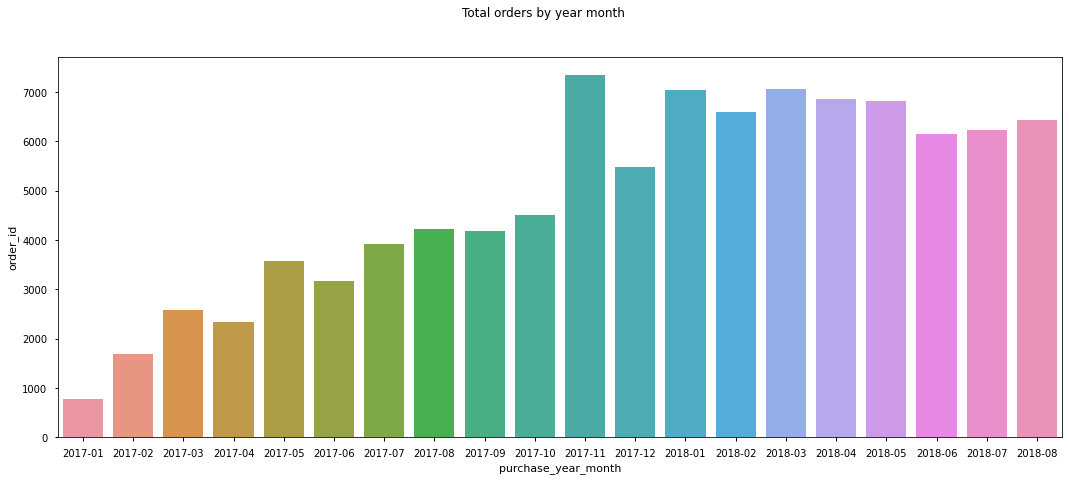

In [ ]:
# Total orders by months
total_orders_month_year = new_df.groupby('purchase_year_month')['order_id'].nunique().reset_index()
plt.figure(figsize = (18,7))
sns.barplot(data = total_orders_month_year,
             x = 'purchase_year_month',
             y = 'order_id')
plt.suptitle("Total orders by year month")

The number of orders started to increase sharply from November 2017, we will find out why there is such a sudden increase

In [ ]:
# The total of categories in 2017
new_df[new_df['purchase_year'] == 2017]['product_category_name'].nunique()

72

In [ ]:
# The total of categories in 2018
new_df[new_df['purchase_year'] == 2018]['product_category_name'].nunique()

72

There is almost no difference in the number of categories in 2017 and 2018

Text(0.5, 0.98, 'Total categories by year month')

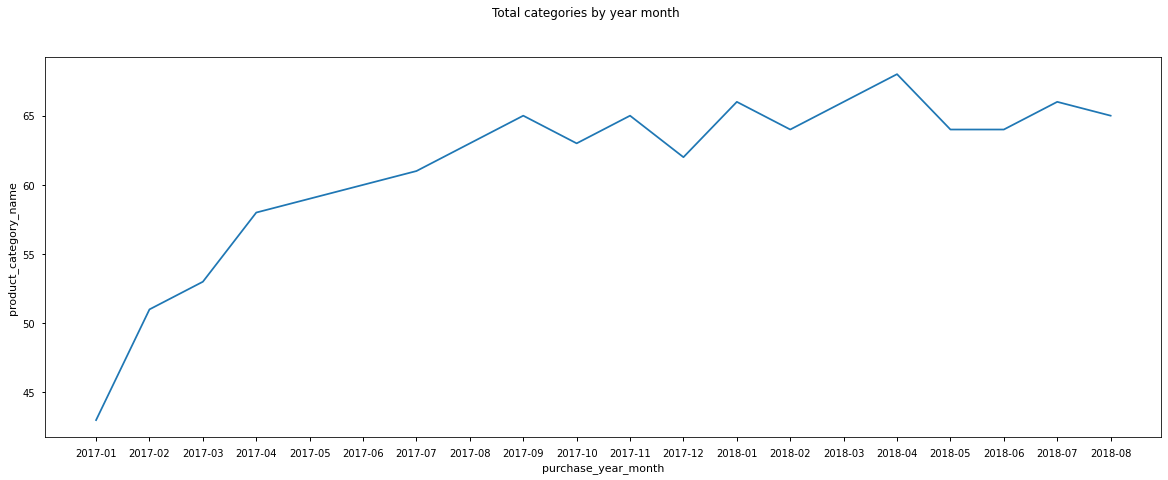

In [ ]:
# Total number of categories which have at least one order by months
total_cat_month_year = new_df.groupby('purchase_year_month')['product_category_name'].nunique().reset_index()
total_cat_month_year['purchase_year_month'] = total_cat_month_year['purchase_year_month'].astype('str')
plt.figure(figsize = (20,7))
sns.lineplot(data = total_cat_month_year,
             x = 'purchase_year_month',
             y = 'product_category_name')
plt.suptitle("Total categories by year month")

It is can be assumed that in 11/2017, there is a large amount of new categories added so it mades the number of orders increased.
However, the data does not support this assumption.

## **Total customer unique by year_month**

Text(0.5, 0.98, 'Total customers unique ID by year month')

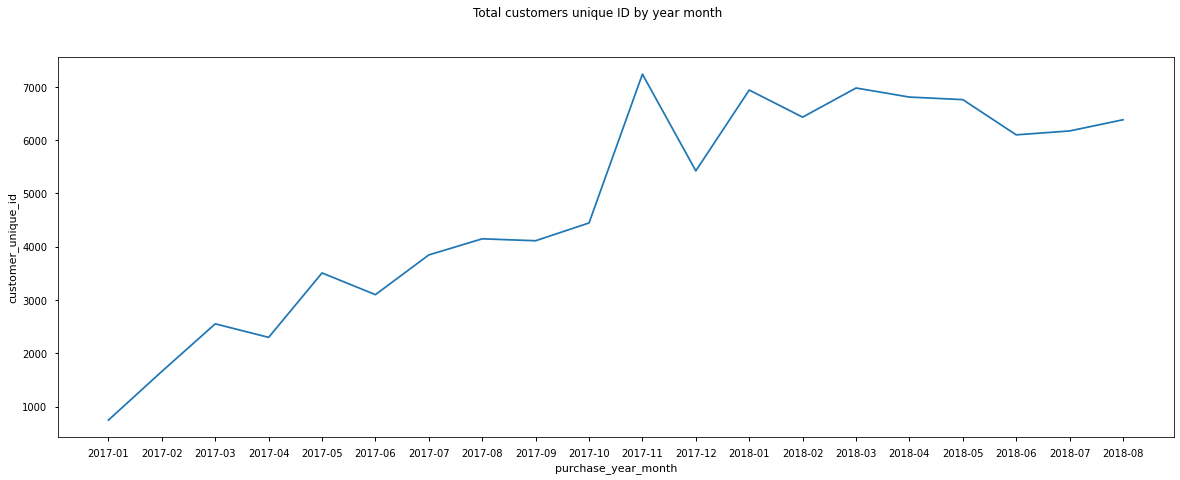

In [ ]:
# Number of customer_unique_id by months
cus_uni_id_year_month = new_df.groupby('purchase_year_month')['customer_unique_id'].nunique().reset_index()
cus_uni_id_year_month['purchase_year_month'] = cus_uni_id_year_month['purchase_year_month'].astype('str')
plt.figure(figsize = (20,7))
sns.lineplot(data = cus_uni_id_year_month,
             x = 'purchase_year_month',
             y = 'customer_unique_id')
plt.suptitle("Total customers unique ID by year month")

There is a certain amount of customer_unique_id rapidly increase in 11/2017, the question is how many percentage of this belong to old customer and how many percentage of it belong to new customer?

This question will be answered by my analytics below.

In [ ]:
# Finding first order of each customer_unique_id
new_df_min_purchase = new_df.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()

# Convert the data type and change the name to min_purchase_year_month
new_df_min_purchase['order_purchase_timestamp'] = new_df_min_purchase['order_purchase_timestamp'].dt.to_period('M')
new_df_min_purchase.columns = ['customer_unique_id','min_purchase_year_month']

# Merge back to the main table
new_df = pd.merge(new_df,new_df_min_purchase, on = 'customer_unique_id')

# Create user_type columms
# If purchase_year_month = min_purchase_year_month -> New Customer
# If purchase_year_month > min_purchase_year_month -> Existing Customer
new_df['user_type'] = 'New'
new_df.loc[new_df['purchase_year_month'] > new_df['min_purchase_year_month'],'user_type'] = 'Existing'

Text(0.5, 0.98, 'Total customers unique ID by year month')

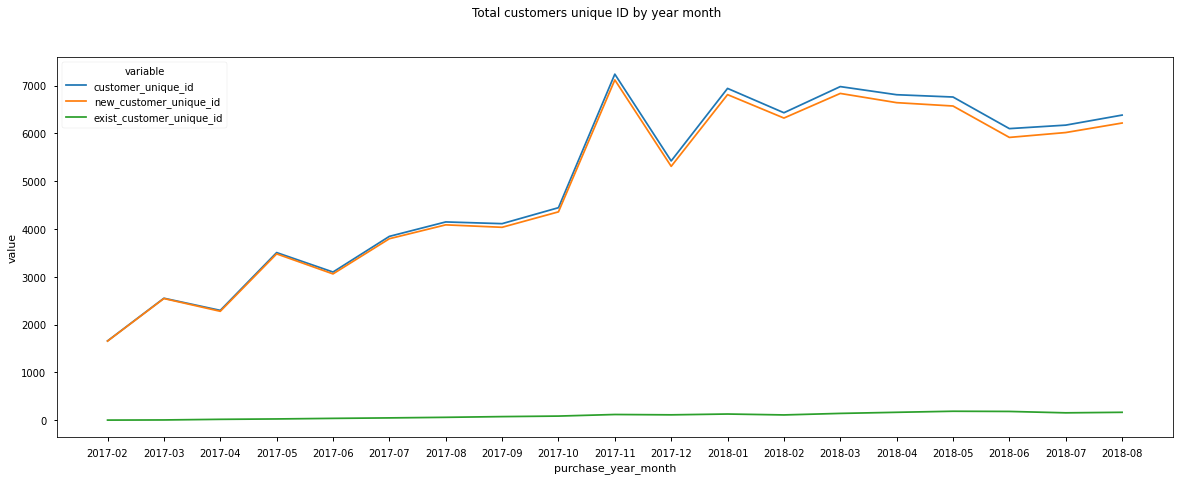

In [ ]:
# Create new table including new_customer_uique_id
new_customer_by_time = new_df[new_df['user_type'] == 'New'].groupby('purchase_year_month')['customer_unique_id'].nunique().reset_index()
new_customer_by_time['purchase_year_month'] = new_customer_by_time['purchase_year_month'].astype('str')
new_customer_by_time.rename(columns={'customer_unique_id': 'new_customer_unique_id'}, inplace = True)

# Create new table including exist_customer_unique_id
exist_customer_by_time = new_df[new_df['user_type'] == 'Existing'].groupby('purchase_year_month')['customer_unique_id'].nunique().reset_index()
exist_customer_by_time['purchase_year_month'] = exist_customer_by_time['purchase_year_month'].astype('str')
exist_customer_by_time.rename(columns={'customer_unique_id': 'exist_customer_unique_id'}, inplace = True)

# Merge to the main table
cus_uni_id_year_month = pd.merge(cus_uni_id_year_month,new_customer_by_time, on = 'purchase_year_month')
cus_uni_id_year_month = pd.merge(cus_uni_id_year_month,exist_customer_by_time, on = 'purchase_year_month')

# Change the data from wide table to long table
cus_uni_id_year_month_melt = cus_uni_id_year_month.melt(id_vars='purchase_year_month')

# Generating chart adressing the ratio between new_customer_unique_id and exist_custome_unique_id with the total customer_unique_id
plt.figure(figsize = (20,7))
sns.lineplot(data = cus_uni_id_year_month_melt,
             x = 'purchase_year_month',
             y = 'value',
             hue = 'variable')
plt.suptitle("Total customers unique ID by year month")

Based on the data, it can be concluded that mainly orders purchased by new customers while the orders from old customers only took small amount.

Therefore, because the customer_unique_id increase in November is the new customrs so the number of orders also increase in this month.

However, there is not enough data to explain the reason why the number of customer_unique_id increase so we analyze the number of orders by days in 11/2017 to get more information.

##**Total orders by days in November 2017**

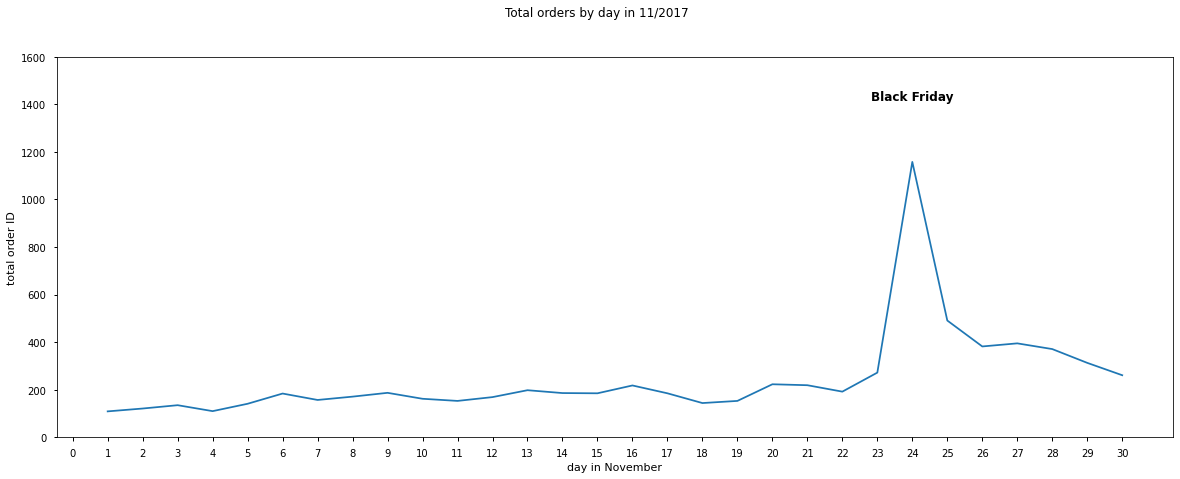

In [ ]:
new_df['purchase_day'] = new_df['order_purchase_timestamp'].dt.day
total_order_day_month = new_df.groupby(['purchase_year_month','purchase_day'])['order_id'].nunique().reset_index()
plt.figure(figsize = (20,7))
sns.lineplot(data = total_order_day_month[total_order_day_month['purchase_year_month'] == '2017-11'],
             x = 'purchase_day',
             y = 'order_id')
plt.suptitle("Total orders by day in 11/2017")
plt.xlabel('day in November')
plt.ylabel('total order ID')
plt.xticks(np.arange(0,31, step = 1))
plt.yticks(np.arange(0,1800, step = 200))
plt.text(24, 1366+50, 'Black Friday', ha='center',fontsize='large', fontweight='bold', color='black')
plt.show()

Based on the data chart, the number of orders speedly increase in 24/11/2017 and the following days.

24/11/2017 was the Black Friday and this was **the key promotion campaign** of Olist in 2017.

In the next days, the promotion keps running till the CyberMonday that made the number of orders were still higher than number of orders in normal days.

A question is raised that if payment value is positively increase like the number of orders.

## **Total payment value by year_month**

In [ ]:
# Create a dataframe including payments and orders
df1 = pd.merge(payments, orders)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   payment_sequential             103886 non-null  int64  
 2   payment_type                   103886 non-null  object 
 3   payment_installments           103886 non-null  int64  
 4   payment_value                  103886 non-null  float64
 5   customer_id                    103886 non-null  object 
 6   order_status                   103886 non-null  object 
 7   order_purchase_timestamp       103886 non-null  object 
 8   order_approved_at              103711 non-null  object 
 9   order_delivered_carrier_date   101998 non-null  object 
 10  order_delivered_customer_date  100754 non-null  object 
 11  order_estimated_delivery_date  103886 non-null  object 
dtypes: float64(1), int64(2), objec

In [ ]:
# Create new_df1 from df1 and choose necessary columms
new_df1 = df1[['order_id','payment_value','order_purchase_timestamp']]

# In table new_df1, select order_id of new_df in 2016 and 9/2018
new_df1 = new_df1[new_df1['order_id'].isin(new_df['order_id'].unique())]

In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101257 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  101257 non-null  object 
 1   payment_value             101257 non-null  float64
 2   order_purchase_timestamp  101257 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
# Change the data type into datetime
new_df1["order_purchase_timestamp"] = pd.to_datetime(new_df1["order_purchase_timestamp"])

# Create purchase_year_month columm
new_df1['purchase_year_month'] = new_df1['order_purchase_timestamp'].dt.to_period('M')

Text(0.5, 1.0, 'Total orders by year month')

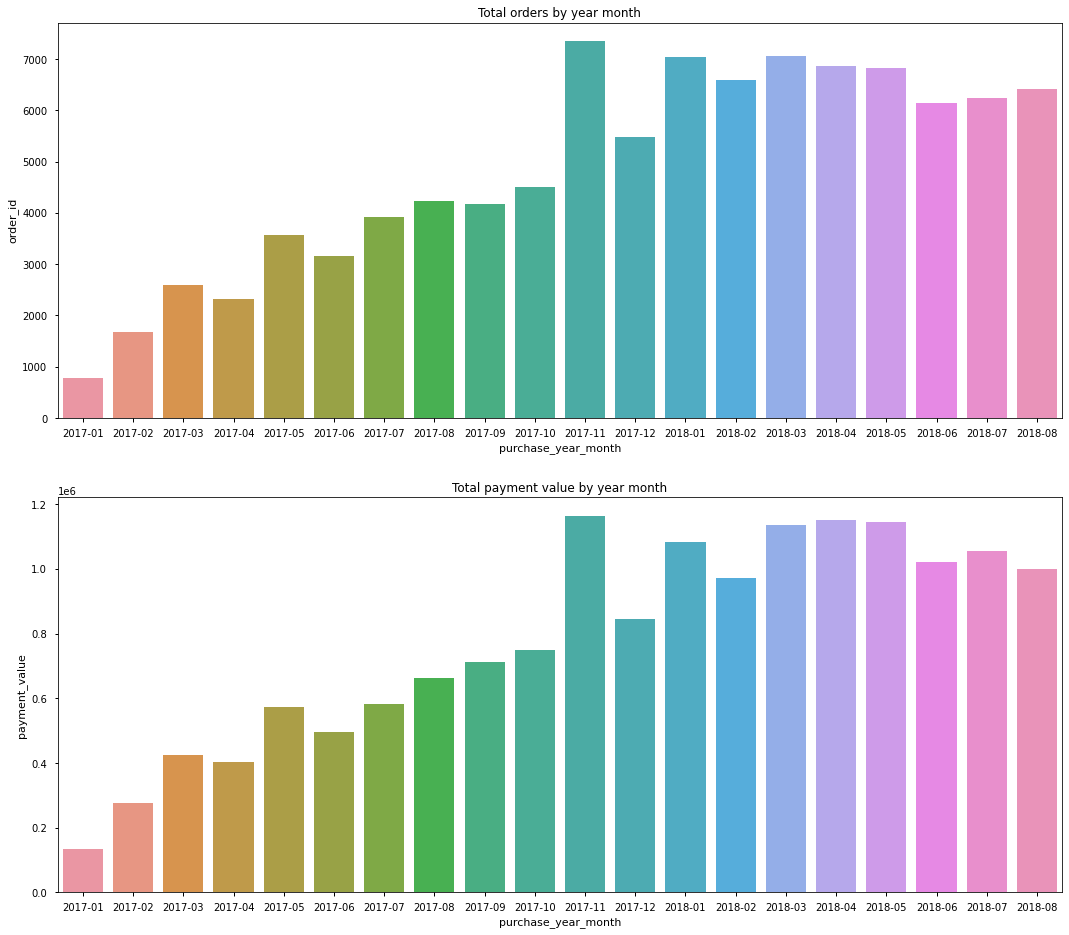

In [ ]:
# Comparing total orders by months and total payment_value by months
payment_value_year_month = new_df1.groupby('purchase_year_month')['payment_value'].sum().reset_index()
plt.figure(figsize = (18,16))
plt.subplot(2,1,2)
sns.barplot(data = payment_value_year_month,
             x = 'purchase_year_month',
             y = 'payment_value')
plt.title("Total payment value by year month")

plt.subplot(2,1,1)
sns.barplot(data = total_orders_month_year,
             x = 'purchase_year_month',
             y = 'order_id')
plt.title("Total orders by year month")

There is no different between total order and payment values

## **Total orders by hour & total orders by day of week**

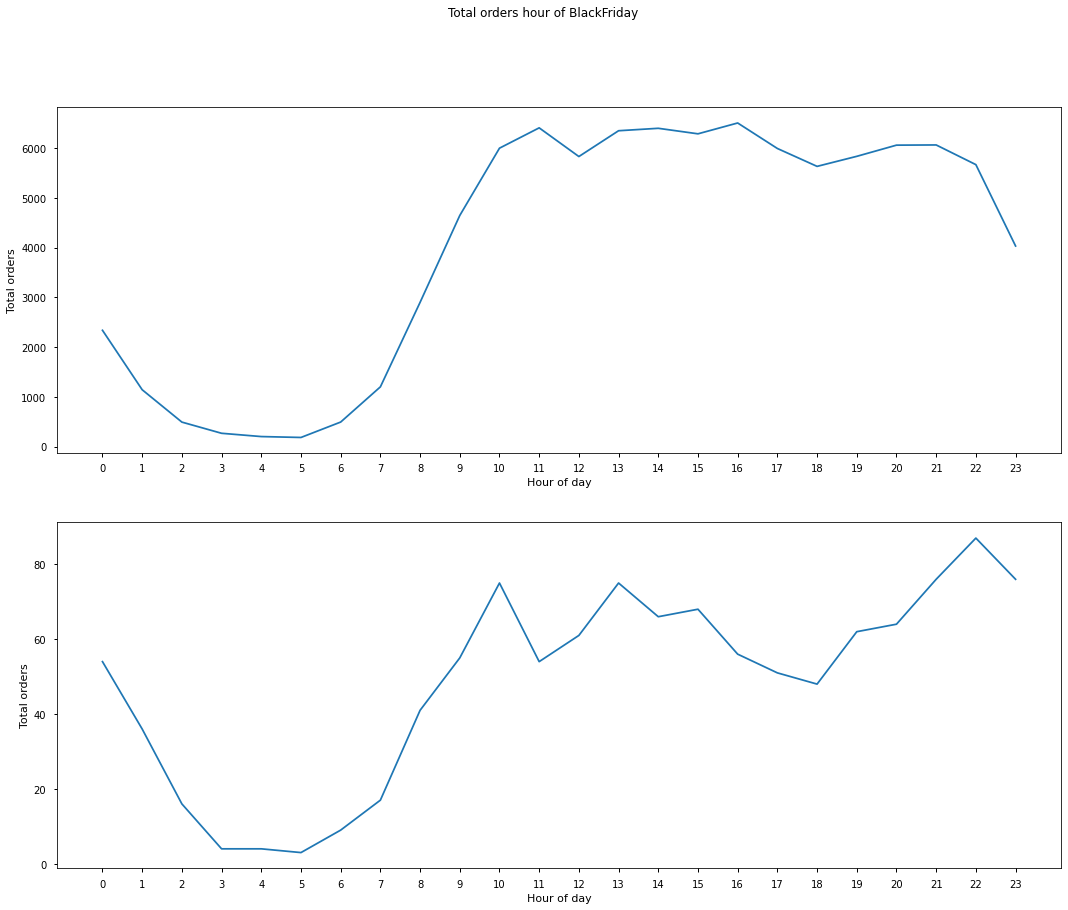

In [ ]:
# Create a columm including purchase timming in a day
new_df['purchase_hour'] = new_df['order_purchase_timestamp'].dt.hour

# View the time when purchasing rate is highest
order_by_hour = new_df.groupby('purchase_hour')['order_id'].nunique().reset_index()
plt.figure(figsize = (18,14))
plt.subplot(2,1,1)
sns.lineplot(data = order_by_hour,
             x = 'purchase_hour',
             y = 'order_id')
plt.suptitle("Total orders hour of day")
plt.xlabel('Hour of day')
plt.ylabel('Total orders')
plt.xticks(np.arange(0,24, step = 1))

order_by_hour_bf = new_df.groupby(['purchase_year_month','purchase_day','purchase_hour'])['order_id'].nunique().reset_index()
plt.subplot(2,1,2)
sns.lineplot(data = order_by_hour_bf[(order_by_hour_bf['purchase_year_month'] == '2017-11') & (order_by_hour_bf['purchase_day'] == 24)],
             x = 'purchase_hour',
             y = 'order_id')
plt.suptitle("Total orders hour of BlackFriday")
plt.xlabel('Hour of day')
plt.ylabel('Total orders')
plt.xticks(np.arange(0,24, step = 1))
plt.show()

Based on the data, the peak of orders falls into the range from 10 am to 10:00 pm, the dynamic rate of the chart is low and decreasing at night.

On the Black Friday, the peak time 10 am, 1:00 pm and 10:00 pm and deeply decrease in certain period of time, increasing at night.

Recommendation for Olist: *Releasing vouchers in the period of time when the order number is low to keep the custome's interaction.
The interaction rate has a positive relationship with the number of orders.*


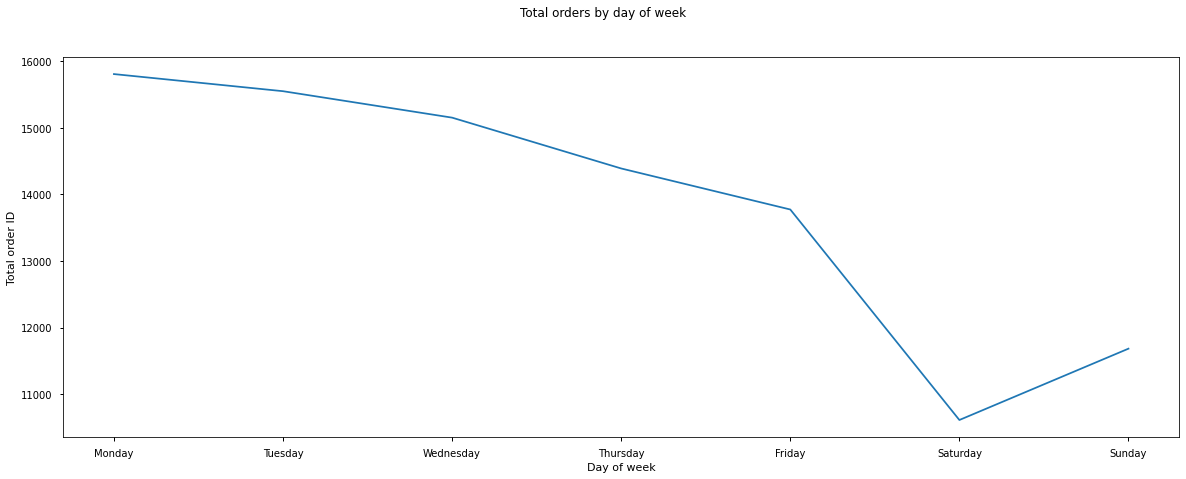

In [ ]:
# Create day of week columms where 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday , 5 = Saturday, 6 = Sunday
new_df['purchase_dayofweek'] = new_df['order_purchase_timestamp'].dt.dayofweek 
order_by_dayofweek = new_df.groupby('purchase_dayofweek')['order_id'].nunique().reset_index()
plt.figure(figsize = (20,7))
sns.lineplot(data = order_by_dayofweek,
             x = 'purchase_dayofweek',
             y = 'order_id')
plt.suptitle("Total orders by day of week")
plt.xlabel('Day of week')
plt.ylabel('Total order ID')
plt.xticks(ticks = [0,1,2,3,4,5,6],
           labels = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday'])
plt.show()

The number of orders increase in the week days and decrease on the weekend.

**Assumption:** Brazilian prefer relax to shopping at the weekend 

Recommendation: *Beside the key promotion campaign, a series of small promotion campain can be run during the year to keep customre traffic, esspecially during the week days.*


## **Sellers**

This section is not belong to the main section but the information is significantly essential for the analyst.

This section answer to the question: Is there any significant relationship about the way seller name their products, describe thems between sellers who sells more and the ones who sell less.

In [ ]:
# Create dft including products, items, and sellers
df2 = pd.merge(products, items, on = 'product_id')
df2 = pd.merge(df2, sellers, on = 'seller_id')

In [ ]:
# Create new_df2 
new_df2 = df2[['order_id','product_id','seller_id','product_name_lenght',
               'product_description_lenght','product_photos_qty']]

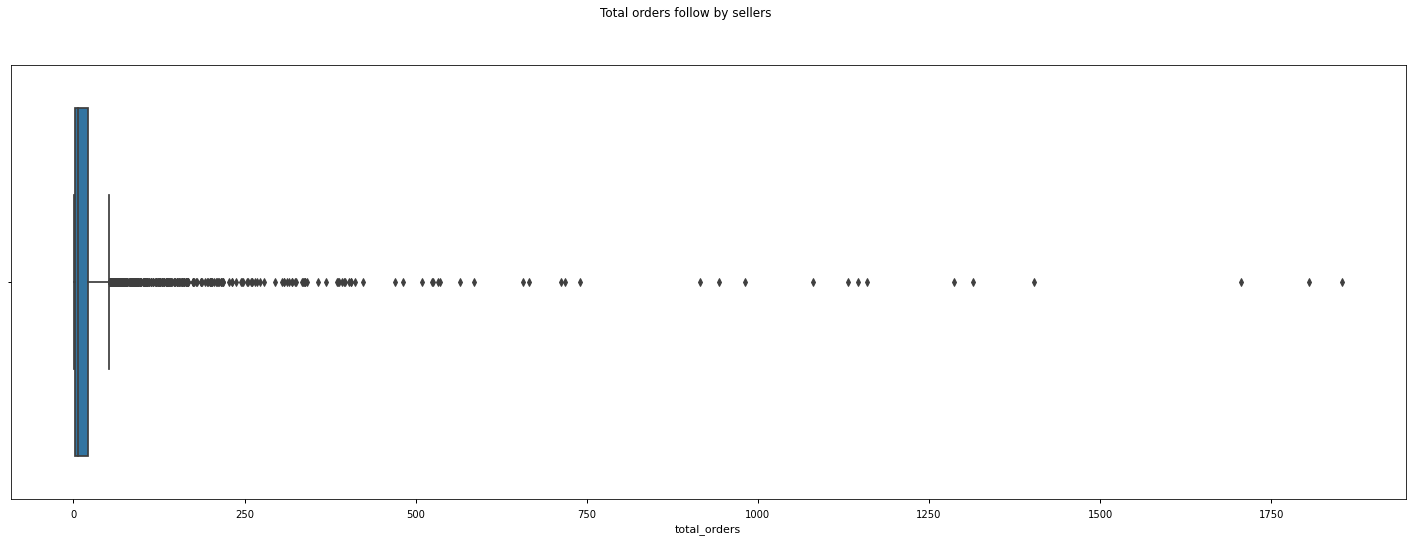

In [ ]:
# Create list_sellers table to generate the number of orders by sellers.
list_sellers = new_df2.groupby('seller_id')['order_id'].nunique().reset_index()

# Generate boxplot chart
plt.figure(figsize = (25,8))
sns.boxplot(data = list_sellers.set_index('seller_id'),
            x = 'order_id')
plt.suptitle("Total orders follow by sellers")
plt.xlabel('total_orders')
plt.show()

In [ ]:
# View the ouliers
Q1= list_sellers['order_id'].quantile(0.25)
Q3 = list_sellers['order_id'].quantile(0.75)
outliers = 1.5*(Q3-Q1) + Q3
outliers

52.0

Most of the sellers only sold under 52 orders, a few sold over 52 orders, so we will use the mark of 52 orders.

Next we will learn the rules of setting name_lenght, description_lenght and photos_qty of sellers who sold over 52 orders

In [ ]:
# Select sellers who sell more than 52 orders
top_sellers = list_sellers[list_sellers['order_id'] > 52]
list_best_sellers = top_sellers['seller_id'].values
print('list_best_sellers', ':', list_best_sellers.shape[0])

# Create new list including product_id of seller_id in list_best_sellers
product_list = []
for seller_id in list_best_sellers:
  list_product_best_sellers = new_df2[new_df2['seller_id'] == seller_id]['product_id'].unique()
  product_list.extend(list_product_best_sellers)
print('total products of best sellers', ':', len(product_list))

list_best_sellers : 403
total products of best sellers : 20023


In [ ]:
# Select sellers who sell less than 52 orders
out_top_sellers = list_sellers[list_sellers['order_id'] <= 52]
out_list_best_sellers = out_top_sellers['seller_id'].values
print('out_list_best_sellers', ':', out_list_best_sellers.shape[0])

# Create new list inlcuding product_id of each seller_id in out_list_best_sellers
out_product_list = []
for seller_id in out_list_best_sellers:
  out_list_product_best_sellers = new_df2[new_df2['seller_id'] == seller_id]['product_id'].unique()
  out_product_list.extend(out_list_product_best_sellers)
print('total products of out list sellers', ':', len(out_product_list))

out_list_best_sellers : 2632
total products of out list sellers : 13815


The number of sellers who sell less than 52 orders (A) is higher than number of sellers who sell more than 52 orders (B) (2632 vs 403)
However, products of A is 1.5 time more than products of B (20023 vs 13815)
- The average of A's products is 50 products.
- The average of B's products is 5 products.

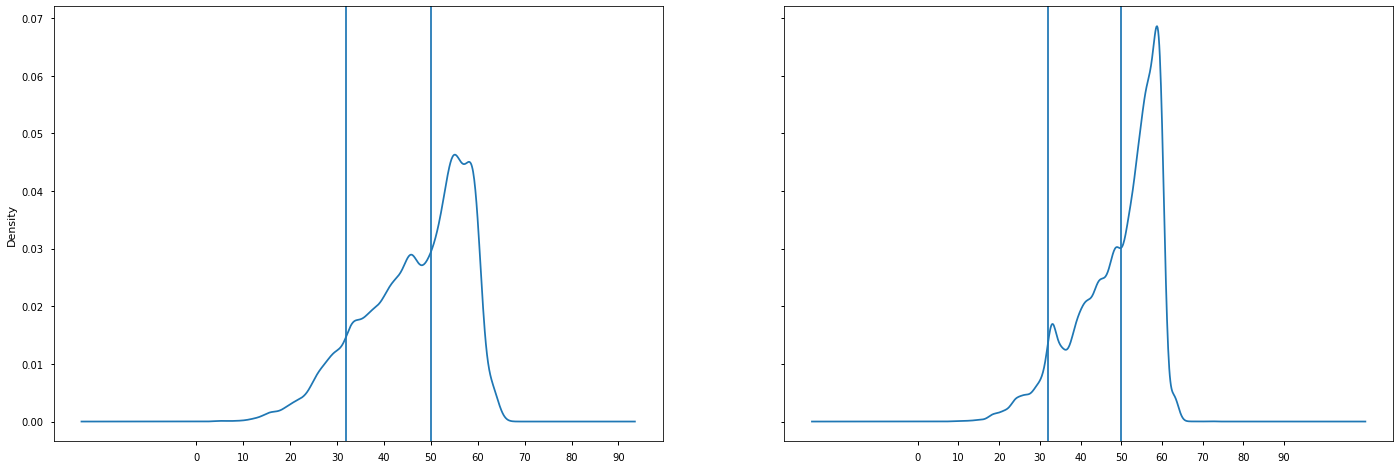

In [ ]:
plt.figure(figsize = (24,8))
ax1 = plt.subplot(1,2,1)
new_df2[new_df2['product_id'].isin(out_product_list)]['product_name_lenght'].plot.kde()
plt.xticks(np.arange(0,100, step = 10))
plt.axvline(x = 32)
plt.axvline(x = 50)

ax2 = plt.subplot(1,2,2, sharey = ax1)
new_df2[new_df2['product_id'].isin(product_list)]['product_name_lenght'].plot.kde()
plt.xticks(np.arange(0,100, step = 10))
plt.axvline(x = 32)
plt.axvline(x = 50)
plt.show()

The left chart belongs to A and the right chart belongs to B

The product name lenght of A is 50-60 characters which is higher than of B

**It can be assumed** that the product name-lenght have a significant relationship with the rate of selling because the more character it has, the higher chance of customer can be search about the products.

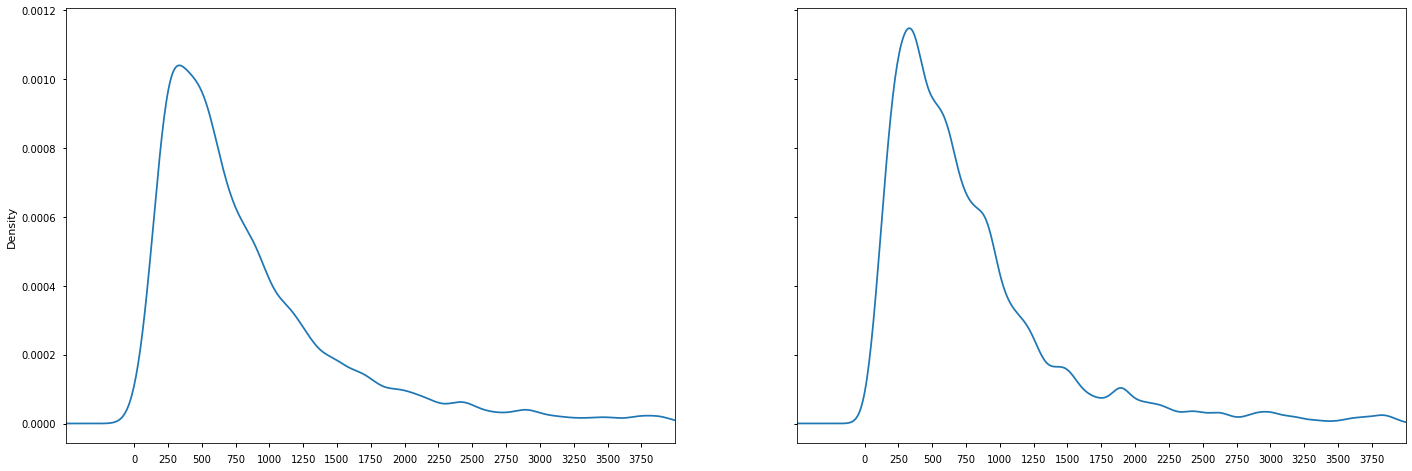

In [ ]:
plt.figure(figsize = (24,8))
ax1 = plt.subplot(1,2,1)
new_df2[new_df2['product_id'].isin(out_product_list)]['product_description_lenght'].plot.kde()
plt.xticks(np.arange(0,4000, step = 250))
plt.xlim(-500,4000)

ax2 = plt.subplot(1,2,2, sharey = ax1)
new_df2[new_df2['product_id'].isin(product_list)]['product_description_lenght'].plot.kde()
plt.xticks(np.arange(0,4000, step = 250))
plt.xlim(-500,4000)
plt.show()

These two charts show no significant different between two description lenght

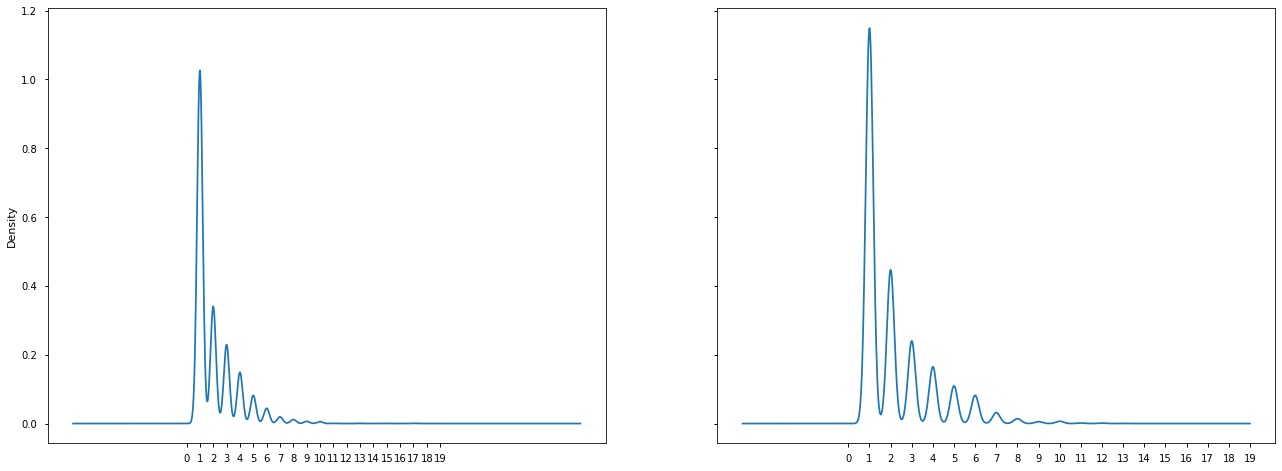

In [ ]:
plt.figure(figsize = (22,8))
ax1 = plt.subplot(1,2,1)
new_df2[new_df2['product_id'].isin(out_product_list)]['product_photos_qty'].plot.kde()
plt.xticks(np.arange(0,20, step = 1))

plt.subplot(1,2,2, sharey = ax1)
new_df2[new_df2['product_id'].isin(product_list)]['product_photos_qty'].plot.kde()
plt.xticks(np.arange(0,20, step = 1))
plt.show()

These two charts show no significant different between two photos quantity

#**Which regions do we need to pay attention to in order to improve logistics services?**

##**Observation And Cleaning Data**

In [ ]:
overview(orders)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
-------------------------
Total number of null values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at    

order_id  ... order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00
3  949d5b44dbf5de918fe9c16f97b45f8a  ...           2017-12-15 00:00:00
4  ad21c59c0840e6cb83a9ceb5573f8159  ...           2018-02-26 00:00:00

[5 rows x 8 columns]

In [ ]:
df = pd.merge(orders, customers, on='customer_id')
df = pd.merge(df, items, on='order_id')
df.head()

order_id  ... freight_value
0  e481f51cbdc54678b7cc49136f2d6af7  ...          8.72
1  53cdb2fc8bc7dce0b6741e2150273451  ...         22.76
2  47770eb9100c2d0c44946d9cf07ec65d  ...         19.22
3  949d5b44dbf5de918fe9c16f97b45f8a  ...         27.20
4  ad21c59c0840e6cb83a9ceb5573f8159  ...          8.72

[5 rows x 18 columns]

In [ ]:
dataNonDuplicates = df.drop_duplicates(subset='customer_unique_id', keep='first')

In [ ]:
overview(geo_location)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
-------------------------
Total number of null values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
-------------------------
Total number of duplicated rows:
261831


geolocation_zip_code_prefix  ...  geolocation_state
0                         1037  ...                 SP
1                         1046  ...                 SP
2                         1046  ...                 SP
3                         1041  ...                 SP
4                         1035  ...                 SP

[5 rows x 5 columns]

In [ ]:
# replacing são paulo with sao paulo as both define same city name
geo_location['geolocation_city'] = geo_location['geolocation_city'].str.strip().str.replace('são paulo', 'sao paulo')
geo_location['geolocation_city'].value_counts()

sao paulo          160718
rio de janeiro      62151
belo horizonte      27805
curitiba            16593
porto alegre        13521
                    ...  
jundiá                  1
herval doeste           1
baía formosa            1
herval d' oeste         1
casserengue             1
Name: geolocation_city, Length: 8007, dtype: int64

Brazil has about 8007 cities

In [ ]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_location = geo_location[geo_location.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_location = geo_location[geo_location.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_location = geo_location[geo_location.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_location = geo_location[geo_location.geolocation_lng <=  -34.79314722]

In [ ]:
# drop duplicates keeping only the first occurrence
# so we have a unique set of latitude and longitude for each zip code, because the zip code prefix we have usually refers to a neighborhood, not the full address.
geo_location = geo_location.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

# some zip_code are in the customers table but not in the geolocation table and vice versa, so we take zip_code that are in both tables by using inner join
geo_data = pd.merge(dataNonDuplicates, 
                    geo_location, 
                    left_on='customer_zip_code_prefix', 
                    right_on='geolocation_zip_code_prefix')

In [ ]:
# read shapefile
map_df = gpd.read_file('/content/gdrive/MyDrive/CODER SCHOOL/Brazilian E-Commerce Project/BRA_adm1/BRA_adm1.shp')
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.drop(['ISO','NAME_0','ID_0','ID_1','HASC_1','CCN_1','CCA_1','TYPE_1','ENGTYPE_1','NL_NAME_1','VARNAME_1'], 
            axis = 1, inplace=True)
map_df.head()

NAME_1                                           geometry
0      Acre  POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...
1   Alagoas  MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...
2     Amapá  MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...
3  Amazonas  POLYGON ((-67.32623 2.02968, -67.30118 1.92997...
4     Bahia  MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...

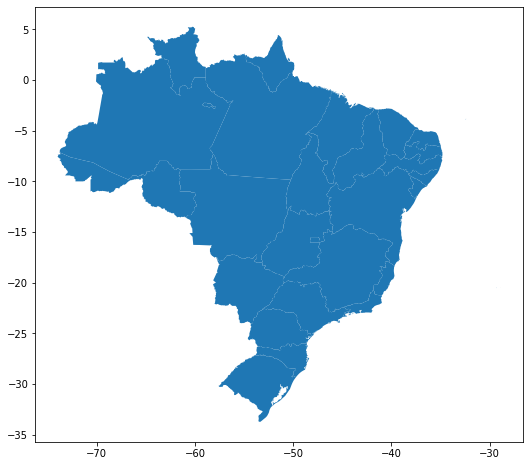

In [ ]:
map_df.plot(figsize=(15, 8))
plt.show()

In [ ]:
geo_data['geolocation_state'].unique()

array(['SP', 'BA', 'GO', 'RN', 'PR', 'RS', 'RJ', 'MG', 'SC', 'RR', 'PE',
       'TO', 'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'RO', 'ES', 'AP', 'MS',
       'MA', 'PI', 'AL', 'AC', 'AM'], dtype=object)

In [ ]:
map_df['NAME_1'].unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso do Sul', 'Mato Grosso', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'São Paulo', 'Santa Catarina', 'Sergipe', 'Tocantins'],
      dtype=object)

In [ ]:
# rename geo_data's state names to merge with brazil GeoDatFrame
replacements = [
    ['SP', 'São Paulo'],
    ['BA', 'Bahia'], 
    ['GO', 'Goiás'],
    ['RN', 'Rio Grande do Norte'],
    ['PR', 'Paraná'],
    ['RS', 'Rio Grande do Sul'],
    ['RJ', 'Rio de Janeiro'],
    ['MG', 'Minas Gerais'],
    ['SC', 'Santa Catarina'],
    ['RR', 'Roraima'],
    ['PE', 'Pernambuco'],
    ['TO', 'Tocantins'],
    ['CE', 'Ceará'],
    ['DF', 'Distrito Federal'],
    ['SE', 'Sergipe'],
    ['MT', 'Mato Grosso'],
    ['PB', 'Paraíba'],
    ['PA', 'Pará'],
    ['RO', 'Rondônia'],
    ['ES', 'Espírito Santo'],
    ['AP', 'Amapá'],
    ['MS', 'Mato Grosso do Sul'],
    ['MA', 'Maranhão'],
    ['PI', 'Piauí'],
    ['AL', 'Alagoas'],
    ['AC', 'Acre'],
    ['AM', 'Amapá']
]

for r in replacements:
    geo_data['geolocation_state'] = geo_data['geolocation_state'].str.replace(r[0], r[1])

In [ ]:
# merge geo_data with map_df
merged = pd.merge(geo_data, map_df, left_on='geolocation_state', right_on='NAME_1')
merged.head()

order_id  ...                                           geometry
0  e481f51cbdc54678b7cc49136f2d6af7  ...  MULTIPOLYGON (((-48.08236 -25.28431, -48.08236...
1  70b35acffdf851e782ebf6fbc35eb620  ...  MULTIPOLYGON (((-48.08236 -25.28431, -48.08236...
2  ad21c59c0840e6cb83a9ceb5573f8159  ...  MULTIPOLYGON (((-48.08236 -25.28431, -48.08236...
3  89632ab0ec088829b4e3338a772f80b4  ...  MULTIPOLYGON (((-48.08236 -25.28431, -48.08236...
4  0cc9e18508708774c1c956cd3ad9e910  ...  MULTIPOLYGON (((-48.08236 -25.28431, -48.08236...

[5 rows x 25 columns]

In [ ]:
# check null
merged.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  13
order_delivered_carrier_date      971
order_delivered_customer_date    2108
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
geolocation_zip_code_prefix         0
geolocation_lat                     0
geolocation_lng                     0
geolocation_city                    0
geolocation_state                   0
NAME_1                              0
geometry                            0
dtype: int64

In [ ]:
# drop null
merged.dropna(inplace=True)
merged.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
geolocation_zip_code_prefix      0
geolocation_lat                  0
geolocation_lng                  0
geolocation_city                 0
geolocation_state                0
NAME_1                           0
geometry                         0
dtype: int64

In [ ]:
len(merged[merged['order_status'] == 'canceled'])

6

In [ ]:
# drop rows with canceled status
merged.drop(merged[merged['order_status'] == 'canceled'].index, inplace=True)

In [ ]:
merged.shape

(93027, 25)

In [ ]:
merged.groupby('geolocation_city').geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_city
sao paulo         2821
rio de janeiro     372
brasilia           307
salvador           214
belo horizonte     182
                  ... 
guapo                1
guapore              1
guarabira            1
guaracai             1
óleo                 1
Name: geolocation_zip_code_prefix, Length: 4164, dtype: int64

sao paulo is the city with the most number of zip codes

##**Analysis**

In [ ]:
# Convert objects date columns to dates
dateColumns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in dateColumns:
    merged[column] = pd.to_datetime(merged[column])

In [ ]:
merged['diff_deliver'] = (merged['order_delivered_customer_date'] - merged['order_estimated_delivery_date']).dt.total_seconds() / (3600 * 24)
merged['deliver'] = (merged['order_delivered_customer_date'] - merged['order_approved_at']).dt.total_seconds() / (3600 * 24)
merged['estimate'] = merged['deliver'] - merged['diff_deliver']

print(merged['estimate'].sort_values(ascending=False).head())


50767    153.576030
4255     149.586262
93579    144.881863
67646    116.090729
45341    109.330833
Name: estimate, dtype: float64


In [ ]:
North = ['Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Rondônia', 'Tocantins']
Northeast = ['Maranhão', 'Piauí', 'Bahia', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe']
Central_West = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']
Southeast = ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo']
South = ['Paraná', 'Santa Catarina', 'Rio Grande do Sul']

In [ ]:
states = merged.groupby(['geolocation_state']).agg({'order_id': 'count', 'freight_value': 'mean', 'deliver': 'mean',
                                                    'diff_deliver': 'mean', 'estimate': 'mean'})
states.reset_index(inplace=True)
states.rename(columns={'order_id': 'number_of_orders', 'freight_value': 'freight_avg', 'deliver': 'deliver_avg',
                       'diff_deliver': 'diff_deliver_avg', 'estimate': 'estimate_avg'}, inplace=True)
states = pd.merge(map_df, states , left_on='NAME_1', right_on='geolocation_state', how='left')
states.loc[3, 'geolocation_state'] = 'Amazonas'
states['coords'] = states['geometry'].apply(lambda x: x.representative_point().coords[:])
states['coords'] = [coords[0] for coords in states['coords']]
states.loc[3, ['number_of_orders', 'freight_avg', 'deliver_avg', 'diff_deliver_avg', 'estimate_avg']] = 0
states['Region'] = states['geolocation_state'].apply(lambda x: 'North' if x in North else 'Northeast' if x in Northeast else 'Central-West' if x in Central_West else 'Southest' if x in Southeast else 'South')
states.head()

NAME_1  ...     Region
0      Acre  ...      North
1   Alagoas  ...  Northeast
2     Amapá  ...      North
3  Amazonas  ...      North
4     Bahia  ...  Northeast

[5 rows x 10 columns]

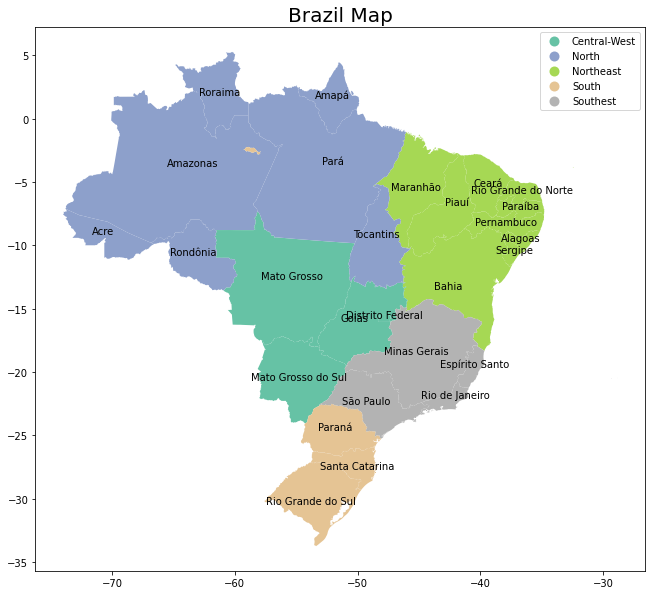

In [ ]:
states.plot('Region', cmap='Set2', legend=True, figsize=(25, 10))
for idx, row in states.iterrows():
     plt.annotate(s=row.geolocation_state, xy=row['coords'], horizontalalignment='center')

plt.title('Brazil Map', fontsize=20)
plt.show()

In [ ]:
print('The number of states in brazil that have orders:', merged['geolocation_state'].nunique())
print('The number of cities in brazil that have orders:', merged['geolocation_city'].nunique())

The number of states in brazil that have orders: 26
The number of cities in brazil that have orders: 4164


Brazil has about 8007 cities. So Olist's customers are already present in about half of the cities in brazil in 2 years.

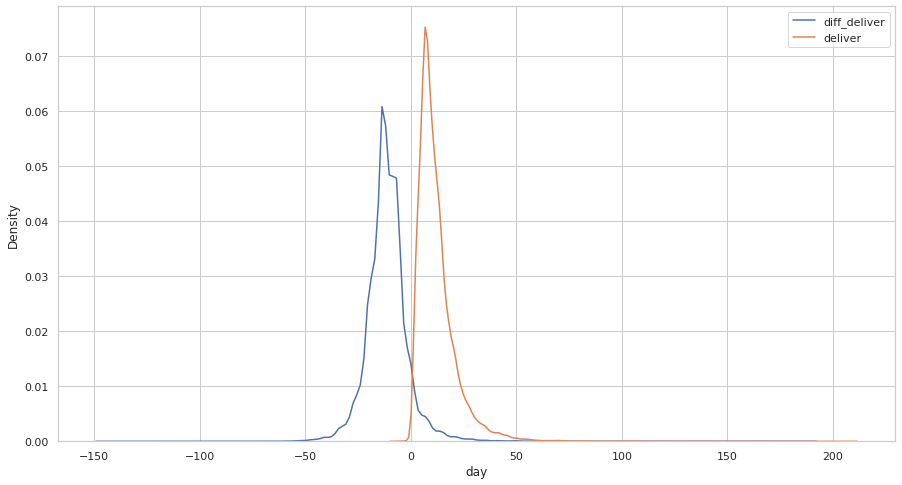

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 8))
sns.kdeplot(merged['diff_deliver'], label='diff_deliver')
sns.kdeplot(merged['deliver'], label='deliver')
plt.xlabel('day')
plt.legend()
plt.show()

We can see that they took 0 to 30 days to deliver items. It's very slow delivery compare to other countries. But, one good thing is they delivered the order in advanced (negative numbers) of estimated date, which is a good strategy to give good impression on delivery service.

In [ ]:
# creating late and ontime labels in Lateness column
merged['Lateness'] = merged['diff_deliver'].apply(lambda x: 'late' if x > 1 else 'ontime') # delay day more than 1 mean 'late'

In [ ]:
merged['Lateness'].value_counts(normalize=True)

ontime    0.931901
late      0.068099
Name: Lateness, dtype: float64

93% the orders are delivered on time. That means the number of estimated days are high.

In [ ]:
merged['estimate'].mean()

23.274867612981737

Average of estimated days is 23. Look at the map below for more information on the distribution of estimated delivery days by states.

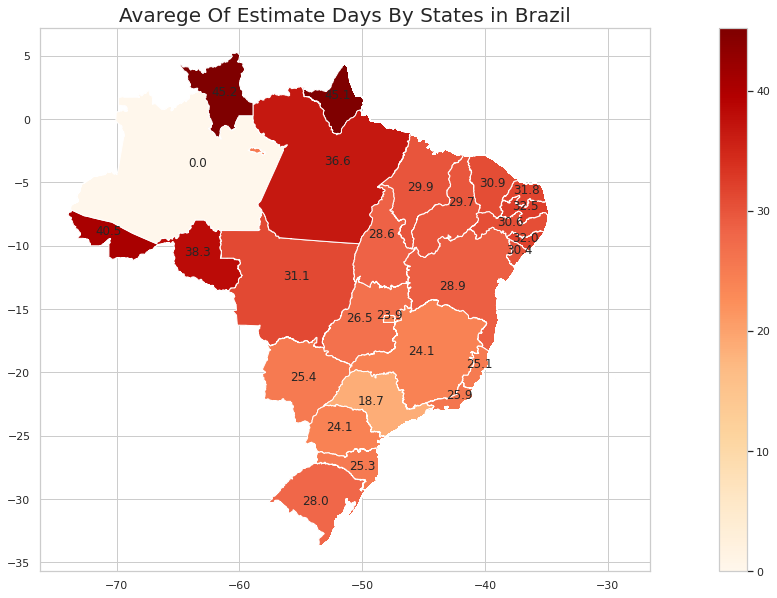

In [ ]:
ax = states.plot('estimate_avg', cmap='OrRd', legend=True, figsize=(25, 10))
for idx, row in states.iterrows():
     plt.annotate(s=round(row.estimate_avg, 1), xy=row['coords'], horizontalalignment='center')

plt.title('Avarege Of Estimate Days By States in Brazil', fontsize=20)
plt.show()

The number of days is estimated to increase from South to North.

In [ ]:
mapCustomers = folium.Map(location=[-15.7941, -47.8825], 
                          tiles='cartodbpositron',
                          zoom_start=4)
locationArr = merged[['geolocation_lat', 'geolocation_lng']].values
HeatMap(data=locationArr, radius=13).add_to(mapCustomers)

print('Where are the active clients from: ')
mapCustomers

Where are the active clients from: 


In [ ]:
#select the cities with more delivery averages
moreDeliver = merged.groupby('geolocation_city')['deliver'].mean().sort_values(ascending=False).head(100).index
deliver_df = merged[merged['geolocation_city'].isin(moreDeliver)]
map_deliver = folium.Map(location=[-15.7941, -47.8825], 
                          tiles='cartodbpositron',
                          zoom_start=4)
locationArr = deliver_df[['geolocation_lat', 'geolocation_lng']].values
HeatMap(data=locationArr, radius=20).add_to(map_deliver)

print('Where are the remote areas:')
map_deliver

Where are the remote areas:


In [ ]:
states[['number_of_orders', 'freight_avg', 'deliver_avg', 'diff_deliver_avg', 'estimate_avg']].describe()

number_of_orders  freight_avg  ...  diff_deliver_avg  estimate_avg
count         27.000000    27.000000  ...         27.000000     27.000000
mean        3445.444444    29.499807  ...        -11.921306     29.228796
std         7745.231572    10.251381  ...          3.958833      8.592360
min            0.000000     0.000000  ...        -20.980602      0.000000
25%          355.000000    21.816986  ...        -13.084303     25.354796
50%          854.000000    32.630966  ...        -11.424403     29.746485
75%         2535.000000    37.529360  ...        -10.149542     31.905247
max        39104.000000    42.959386  ...          0.000000     45.229643

[8 rows x 5 columns]

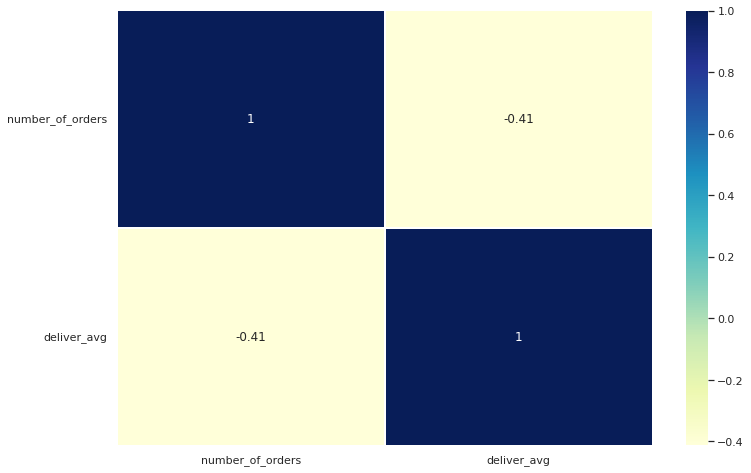

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(states[['number_of_orders', 'deliver_avg']].corr(), annot=True, cmap="YlGnBu", linewidths=.5)
plt.yticks(rotation='horizontal')
plt.show()

This article below demonstrates that reducing delivery times increases customer satisfaction.

https://www.sdcexec.com/warehousing/article/21174205/how-ecommerce-customer-satisfaction-drives-faster-delivery-values

And look at the heatmap above, we can see that correlation coefficient between the number of orders and delivery days is moderately inversely. So we can believe that reduce the number of delivery days will increse the number of orders.

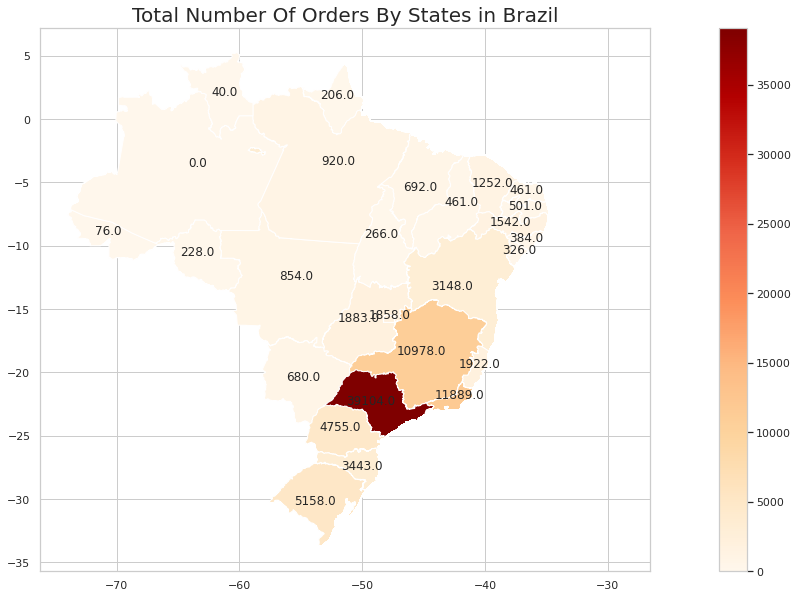

In [ ]:
ax = states.plot('number_of_orders', cmap='OrRd', legend=True, figsize=(25, 10))
for idx, row in states.iterrows():
     plt.annotate(s=round(row.number_of_orders, 1), xy=row['coords'], horizontalalignment='center')

plt.title('Total Number Of Orders By States in Brazil', fontsize=20)
plt.show()

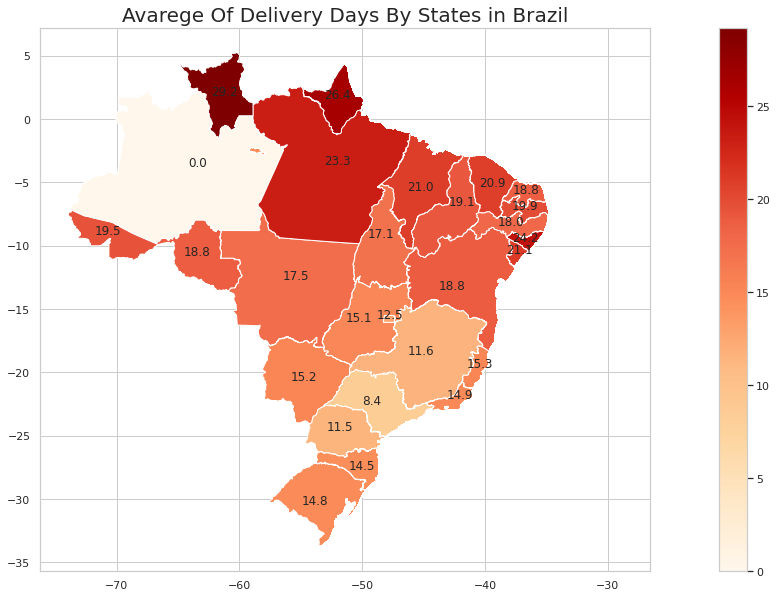

In [ ]:
ax = states.plot('deliver_avg', cmap='OrRd', legend=True, figsize=(25, 10))
for idx, row in states.iterrows():
     plt.annotate(s=round(row.deliver_avg, 1), xy=row['coords'], horizontalalignment='center')

plt.title('Avarege Of Delivery Days By States in Brazil', fontsize=20)
plt.show()

Look at 2 maps above, we can see the contrast between the northern region and the southern sector. The number of orders is concentrated mainly in the state of Sao Paulo, and the further north the number of shipping days will increase, which means this is one of Olist's key markets in Brazil.

So we will choose the top 10 states with the largest number of orders and then extract the 5 states with the largest number of shipping days in those 10 states.

In [ ]:
top_10_orders = states.sort_values(by='number_of_orders', ascending=False)[['geolocation_state', 'number_of_orders', 'deliver_avg']].head(10)
top_10_orders

geolocation_state  number_of_orders  deliver_avg
23          São Paulo           39104.0     8.354849
18     Rio de Janeiro           11889.0    14.919555
12       Minas Gerais           10978.0    11.586530
20  Rio Grande do Sul            5158.0    14.798232
15             Paraná            4755.0    11.500967
24     Santa Catarina            3443.0    14.502246
4               Bahia            3148.0    18.840065
7      Espírito Santo            1922.0    15.295659
8               Goiás            1883.0    15.117206
6    Distrito Federal            1858.0    12.465053

In [ ]:
top_5_diff = top_10_orders.sort_values(by='deliver_avg', ascending=False).head(5)
top_5_diff

geolocation_state  number_of_orders  deliver_avg
4               Bahia            3148.0    18.840065
7      Espírito Santo            1922.0    15.295659
8               Goiás            1883.0    15.117206
18     Rio de Janeiro           11889.0    14.919555
20  Rio Grande do Sul            5158.0    14.798232

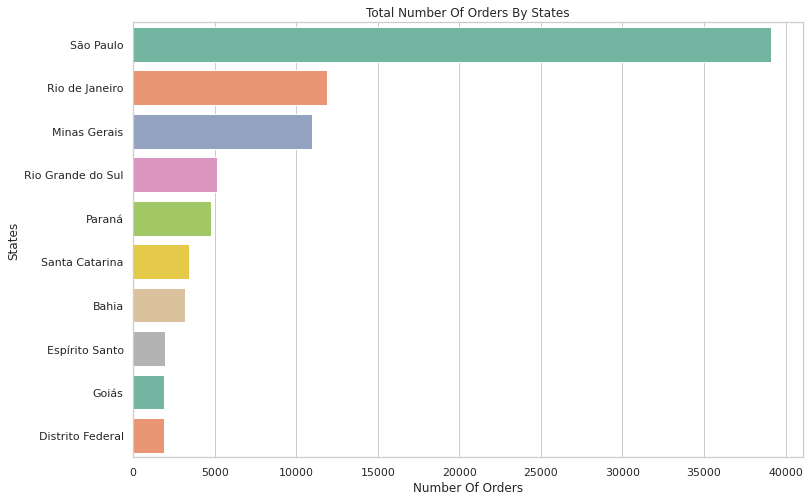

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_orders,
              x='number_of_orders',
              y='geolocation_state',
              orient='h',
              palette='Set2'
            )
plt.title('Total Number Of Orders By States')
plt.xlabel('Number Of Orders')
plt.ylabel('States')

plt.show()

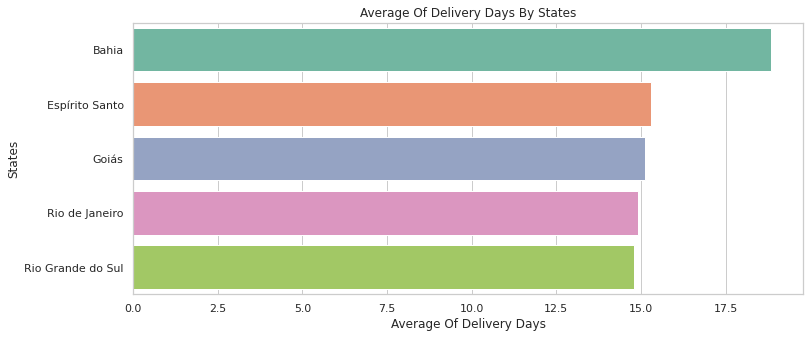

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_5_diff,
              x='deliver_avg',
              y='geolocation_state',
              orient='h',
              palette='Set2'
            )
plt.title('Average Of Delivery Days By States')
plt.xlabel('Average Of Delivery Days')
plt.ylabel('States')

plt.show()

In [ ]:
final_list = list(top_5_diff['geolocation_state'])
final_list

['Bahia', 'Espírito Santo', 'Goiás', 'Rio de Janeiro', 'Rio Grande do Sul']

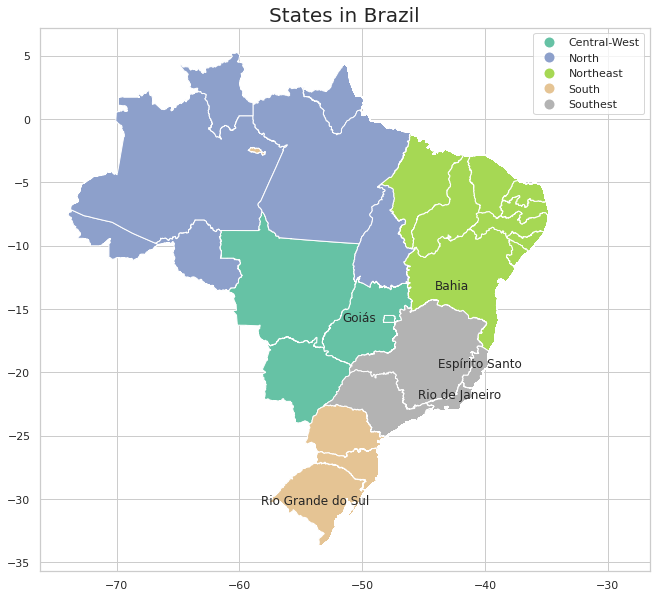

In [ ]:
states.plot('Region', cmap='Set2', legend=True, figsize=(25, 10))
for idx, row in states[states['geolocation_state'].isin(final_list)].iterrows():
     plt.annotate(s=row.geolocation_state, xy=row['coords'], horizontalalignment='center')

plt.title('States in Brazil', fontsize=20)
plt.show()

This is final 5 states. Then continue to analize timeline of the number of delivery days of those 5 states.

In [ ]:
merged['Year-Month'] = merged['order_approved_at'].dt.to_period('M')

In [ ]:
deliver_avg_yearmonth = merged[merged['Year-Month'] >= '2017-01'].groupby(['geolocation_state', 'Year-Month']).deliver.mean().reset_index()
deliver_avg_yearmonth['Year-Month'] = deliver_avg_yearmonth['Year-Month'].astype(str)
deliver_avg_yearmonth['Year-Month'] = pd.to_datetime(deliver_avg_yearmonth['Year-Month'])

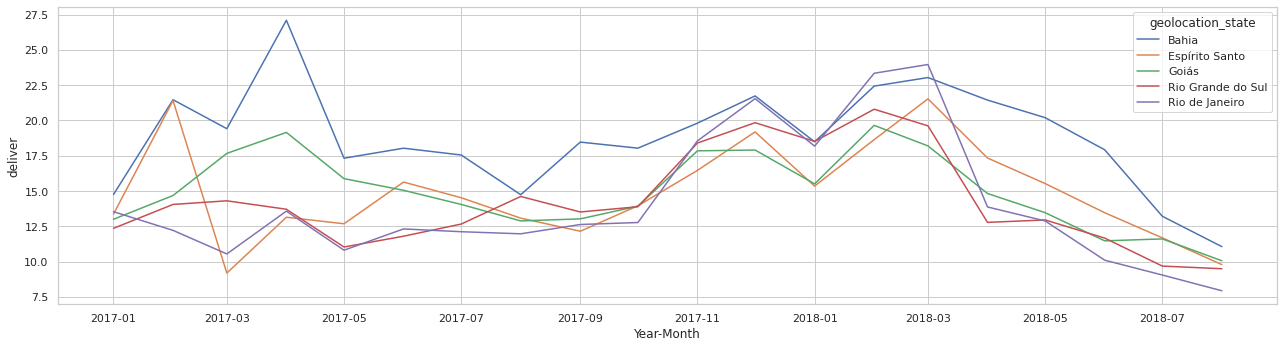

In [ ]:
plt.figure(figsize=(18, 5))
data = deliver_avg_yearmonth[deliver_avg_yearmonth['geolocation_state'].isin(final_list)]
sns.lineplot(data=data,
             x='Year-Month',
             y='deliver',
             hue='geolocation_state'
             )

plt.tight_layout()
plt.show() 

In most states, shipping days will be high in February, March, April, and November.